In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
X_test.shape, y_test.shape

((154, 9), (154,))

## Bagging(RandomForest)

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [11]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_predict = model.predict(X_test)

In [21]:
model.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

In [22]:
feature_names = X_train.columns.tolist()

<AxesSubplot:>

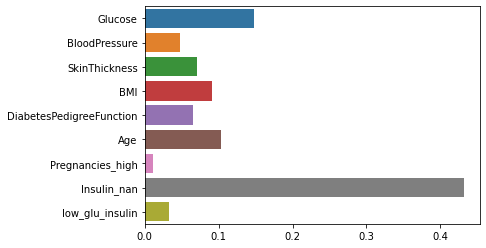

In [23]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8701298701298701

## Boosting

### GradientBoosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [26]:
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
y_predict = model.predict(X_test)

In [28]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

In [29]:
feature_names = X_train.columns.tolist()

<AxesSubplot:>

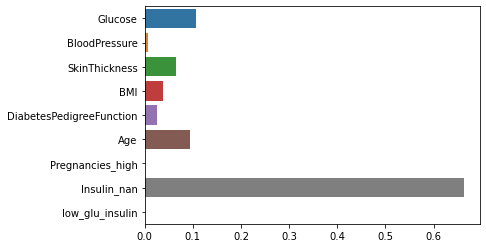

In [30]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

### LGBM

In [39]:
import warnings

warnings.filterwarnings(action='ignore') 

In [40]:
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train)
lgb_param = {'max_depth':10,
            'learning_rate':0.01,
            'n_estimators':100,
             'objective':'multiclass',
             'num_class':len(set(y_train))+1}
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(X_test),axis = 1)

print("Accuracy: %.2f"% (accuracy_score(y_test, lgb_model_predict)*100), "%")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 9
[LightGBM] [Info] Start training from score -0.426034
[LightGBM] [Info] Start training from score -1.058703
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### XGBoost

In [53]:
import xgboost as xgb
xgb_dtrain = xgb.DMatrix(data = X_train, label = y_train)
xgb_dtest = xgb.DMatrix(data = X_test)
xgb_param = {'max_depth':10,
            'learning_rate':0.01,
            'n_estimators':100,
             'objective':'multi:softmax',
             'num_class':len(set(y_train))+1}
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain)
xgb_model_predict = xgb_model.predict(xgb_dtest)

print("Accuracy: %.2f"% (accuracy_score(y_test, xgb_model_predict)*100), "%")

[23:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.77 %


## 여러개의 알고리즘 비교

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42),
             xgb.XGBClassifier(random_state=42), 
             lgb.LGBMClassifier(random_state=42) 
            ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 LGBMClassifier(random_state=42)]

In [62]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([17,  3, 14,  9,  3,  2,  7, 12, 16,  8])

In [63]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.85075567, 0.53713972, 0.60507457, 0.41387086, 0.88310101,
       0.76859648, 0.41596176, 0.45401482, 0.79433308, 0.49473128])

In [64]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier'],
 ['XGBClassifier'],
 ['LGBMClassifier']]

In [65]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[23:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds f

In [66]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.9893880617218542, 'max_dept...",0.859963,0.818182,"{'mean_fit_time': [0.009000396728515625, 0.006..."
1,RandomForestClassifier,"{'n_estimators': 170, 'max_features': 0.359466...",0.903958,0.857143,"{'mean_fit_time': [0.5517991542816162, 0.48579..."
2,GradientBoostingClassifier,"{'n_estimators': 131, 'max_features': 0.458628...",0.903972,0.870130,"{'mean_fit_time': [0.8907960891723633, 0.55419..."
3,XGBClassifier,"{'n_estimators': 105, 'max_features': 0.851128...",0.903945,0.831169,"{'mean_fit_time': [0.2410294532775879, 0.14579..."
4,LGBMClassifier,"{'n_estimators': 128, 'max_features': 0.830105...",0.894189,0.863636,"{'mean_fit_time': [0.3180696964263916, 0.24019..."
